In [1]:
import pandas as pd
import numpy as np 

In [2]:
df=pd.read_csv('C:/Users/Asus/Desktop/titanic.csv') #used for dataextraction

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.dropna(inplace=True)

In [8]:
df['Pclass'].unique()

array([1, 3, 2], dtype=int64)

In [9]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [11]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

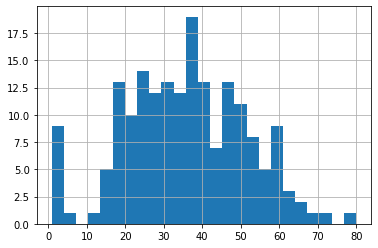

In [16]:
df['Age'].hist(bins=25);

# Data Pre-processing

In [46]:
X = df[['Pclass','Sex','Age']]

In [47]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [51]:
X['Sex']=lb.fit_transform(X['Sex'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
X.head()

,Pclass,Sex,Age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [53]:
y = df['Survived']

In [54]:
y.value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [62]:
rf_clf = RandomForestClassifier(random_state=42)

In [63]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [71]:
pre=rf_clf.predict(X_test)

In [74]:
fit=rf_clf.fit(X,y)

In [77]:
rf_clf.score(X,y)

0.9398907103825137